<a href="https://colab.research.google.com/github/itsmimahi/ML-Classification-Project/blob/main/ML%20Classification%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Probleme statement`
Problem Statement:
In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# Data Description -


*   Battery_power - Total energy a battery can store in one time measured in mAh
* Blue - Has bluetooth or not
* Clock_speed - speed at which microprocessor executes instructions
* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
*Four_g - Has 4G or not
*Int_memory - Internal Memory in Gigabytes
*M_dep - Mobile Depth in cm
*Mobile_wt - Weight of mobile phone
*N_cores - Number of cores of processor
*Pc - Primary Camera mega pixels
*Px_height - Pixel Resolution Height
*Px_width - Pixel Resolution Width
*Ram - Random Access Memory in Mega Bytes
*Sc_h - Screen Height of mobile in cm
*Sc_w - Screen Width of mobile in cm
*Talk_time - longest time that a single battery charge will last when you are
*Three_g - Has 3G or not
*Touch_screen - Has touch screen or not
*Wifi - Has wifi or not
*Price_range - This is the target variable with value of
* 0(low cost)

* 1(medium cost)

* 2(high cost)

* 3(very high cost)

Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

   




In [3]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# setting max display column limit to 30
pd.set_option('display.max_columns', 30)

In [4]:
# Mounting drive
from google.colab import drive

In [5]:
# File path
file_path = "/content/drive/MyDrive/ML Classification project/data_mobile_price_range.csv"

In [6]:
# Importing csv file in our dataframe
mobile_data = pd.read_csv(file_path)

In [16]:
# Getting number of rows and number of column of our dataset.
mobile_data.shape

(2000, 21)

In [10]:
# Overview of our dataset.
mobile_data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
mobile_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [11]:
# Getting information about dataset.
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [18]:
# Checking statistical information of our dataset.
mobile_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


* We can see that sc_w and px_height column has minimum value is 0 which is not possible, so we have to do something with it.

In [24]:
# Checking how many observations of screen width column value has 0.
print(mobile_data[mobile_data['sc_w']==0].shape[0])

180


In [29]:
# Checking how many observation having px_height value as 0.
print(mobile_data[mobile_data['px_height']==0].shape[0])

0


In [28]:
# As there are only 2 observation in which px_height = 0, so we will drop it.
mobile_data = mobile_data[mobile_data['px_height']!= 0]

# Nearest neighbor imputation (KNN imputer)
Missing values are imputed by using K-Nearest Neighbor approach where euclidean distance is use to find the nearest neighbor

Before using K-nearest neighbor we need to replace 0 with NaN values, only after that it will work.


In [30]:
# Replacing 0 with NaN, so we can use KNN imputer.
mobile_data['sc_w'] = mobile_data['sc_w'].replace(0,np.nan)

In [31]:
# Import KNN imputer from sklearn.
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_data = pd.DataFrame(impute_knn.fit_transform(mobile_data), columns=mobile_data.columns)

In [33]:
# Checking shape
mobile_data.shape

(1998, 21)

In [35]:
# Checking how many observation value of sc_w as 0.
print(mobile_data[mobile_data['sc_w']==0].shape[0]) 

0


**we have handled the mismatch values**

In [40]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

* We dont have any object data type in our dataset
* We dont have any null values in our dataset
* price_range is our target varaible

In [41]:
# Checking null values.
mobile_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, 'Visualising Null values')

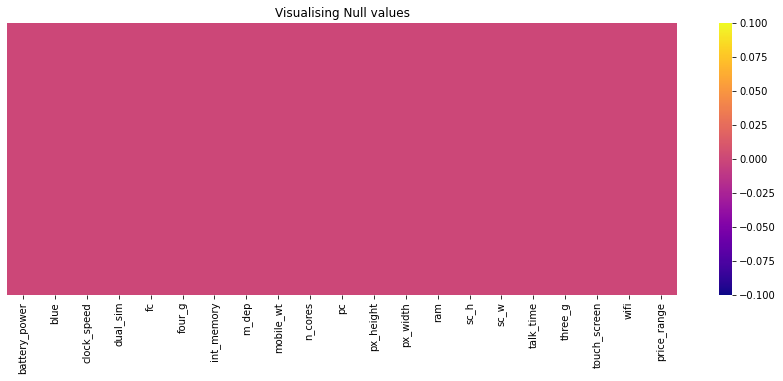

In [47]:
# Visualising null values on heatmap.
plt.figure(figsize = (15,5))
sns.heatmap(mobile_data.isnull(), cmap='plasma', annot = False, yticklabels = False)
plt.title('Visualising Null values')

In [48]:
# Checking duplicate values in dataset.
print(f'we have {mobile_data.duplicated().sum()} duplicate values in our dataset ')

we have 0 duplicate values in our dataset 


# **`EXPLORATORY DATA ANALYSIS (EDA)`**

In [50]:
# Lets have a look at our target variable.
price_range_values = mobile_data['price_range'].value_counts()

**As we can see that counts of target variable is equally distributed in all categories, thus we dont have imblance target variable which is good for us.**

**Accuracy score will be the best evaluation metric for us to selet the model.**

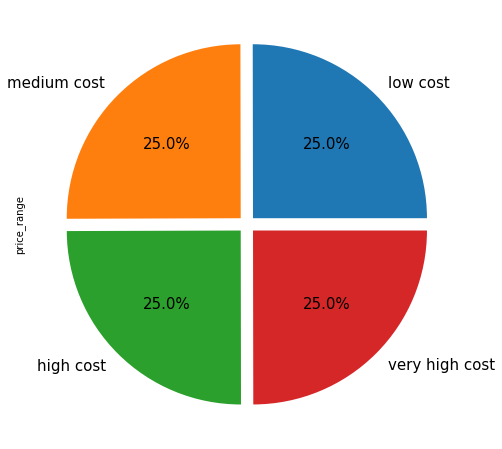

In [51]:
# Visualising the target variable class distribuation.
labels = ['low cost','medium cost','high cost','very high cost']
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting pie chart



# Corelation of dependant variable with other independant varaible.

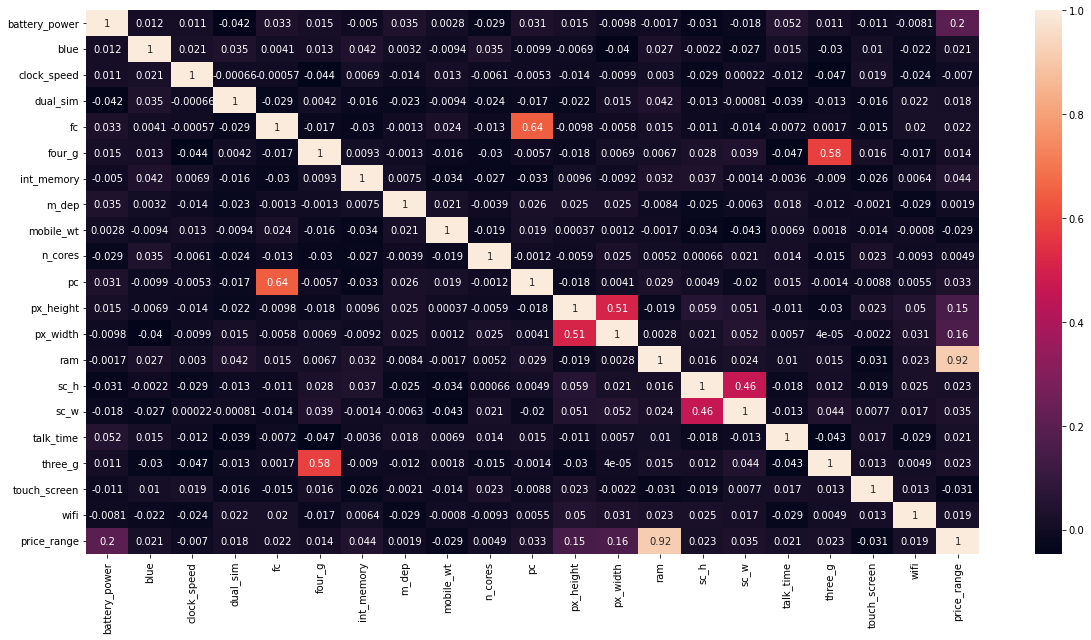

In [53]:
corr = mobile_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

Observations:
* RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.
* Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.
* Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.

* Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.

* primary camera i.e pc and front camera fc are positively correlated.

* sc_h and sc_w are positively correlated

# **Univaraite analysis of categorical column**

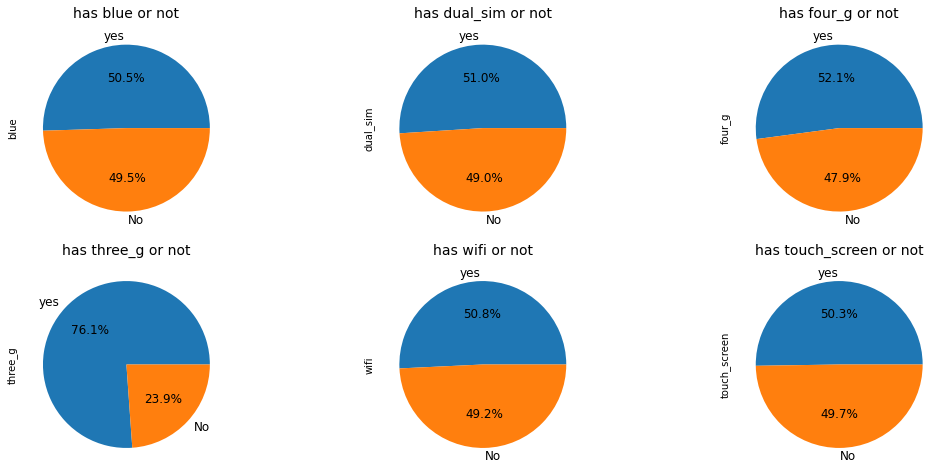

In [56]:
# Plotting the pie chart for binary categorical column.
plt.figure(figsize=(15,10))

rows = 3
col = 3
count = 1
var_list = ['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels = ['yes','No']

for var in var_list:
  plt.subplot(rows,col,count)
  mobile_data[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize = 12, labels = labels,)
  plt.title(f'has {var} or not',fontsize = 14)
  plt.tight_layout()
  count = count+1

* 1 means it has the specification
* 0 it does not have the specification
* percentage distribution of mobiles having bluetooth,4G,dual sim,wifi,touch screen are almost 50%.
* very few mobile(23.9%) mobile dont have 3G service.

# **Relation between RAM, Battary_power, px_height, px_width.**

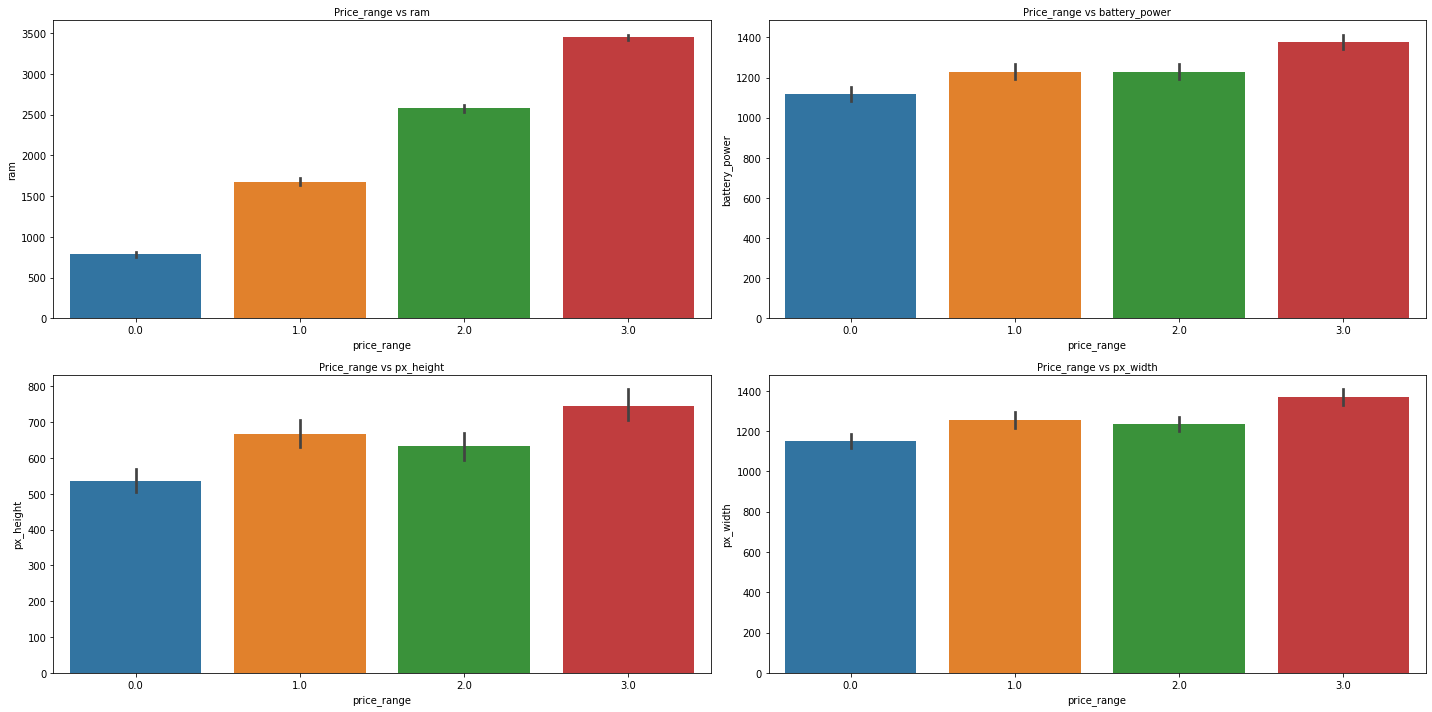

In [60]:
# Plotting price_range vs other feature.

plt.figure(figsize=(20,10))
labels = ['0 = low_cost','1 = medium_cost','2 = high_cost','3 = very_high_cost']

rows = 2
col = 2
count = 1

variables = ['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,col,count)
  sns.barplot(x = mobile_data['price_range'], y= mobile_data[var])
  plt.title(f'Price_range vs {var}', fontsize = 10)
  count = count+1
  plt.tight_layout()